## Using an existing Deep Neural Network to predict new data

In [1]:
#Importing Libraries

import pandas_datareader as web
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pathlib import Path

In [14]:
#data extraction

ticker = '^NDX'

start = dt.datetime(2021,11,1)
end = dt.datetime.now()

df = web.DataReader(ticker, 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-30,16454.560547,16073.759766,16333.950195,16135.919922,6609380000,16135.919922
2021-12-01,16427.189453,15864.000000,16347.959961,15877.719727,6266020000,15877.719727
2021-12-02,16066.320312,15770.919922,15791.299805,15990.759766,5390100000,15990.759766
2021-12-03,16089.610352,15543.309570,16039.410156,15712.040039,5859520000,15712.040039
2021-12-06,15898.586914,15557.782227,15744.900391,15846.158203,822267522,15846.158203


In [53]:
#Extracting dates to use later

dates = df.reset_index()
dates = dates.iloc[:,0].to_frame()

In [15]:
#Setting target and feature variables 

X = df.drop(columns=["Close"])
y = df["Close"]

X = np.array(X).reshape(-1,5)
y = np.array(y).reshape(-1,1)


#Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X).reshape(-1,5)
y = scaler.fit_transform(y).reshape(-1,1)


In [16]:
# Loading the model to predict values
from tensorflow.keras.models import model_from_json

# Loading json and create model
file_path = Path("ndx_model.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Loading weights into new model
file_path = "ndx_model.h5"
loaded_model.load_weights(file_path)

In [17]:
#Making Predictions with the loaded model

predictions = loaded_model.predict(X)

In [18]:
#Retreiving unscaled prices

predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))


In [22]:
#Checking the predictions

predicted_prices

array([[15752.605],
       [15823.412],
       [15946.392],
       [16170.667],
       [16296.448],
       [16260.704],
       [16242.825],
       [16022.764],
       [15996.696],
       [16010.959],
       [16101.923],
       [16129.098],
       [16252.768],
       [16307.244],
       [16481.268],
       [16529.531],
       [16208.394],
       [16146.166],
       [16124.665],
       [16226.621],
       [16236.857],
       [16171.539],
       [15811.158],
       [15850.767],
       [15746.329]], dtype=float32)

In [49]:
#Creating a data frame of actual prices and predicted prices

a = df['Close']

df_test = pd.DataFrame(predicted_prices, columns = ['Predicted'])
df_test["Date"] = dates
df_test.set_index('Date', inplace=True)
df_test["Actual_Price"] = a 
df_test

,Predicted,Actual_Price
Date,,
2021-11-01,15752.605469,15905.280273
2021-11-02,15823.412109,15972.490234
2021-11-03,15946.391602,16144.500000
2021-11-04,16170.666992,16346.240234
2021-11-05,16296.448242,16359.379883
2021-11-08,16260.704102,16336.030273
2021-11-09,16242.825195,16219.940430
2021-11-10,16022.763672,15985.570312
2021-11-11,15996.696289,16032.469727


<AxesSubplot:title={'center':'Actual Price vs Predicted Price'}, xlabel='Date'>

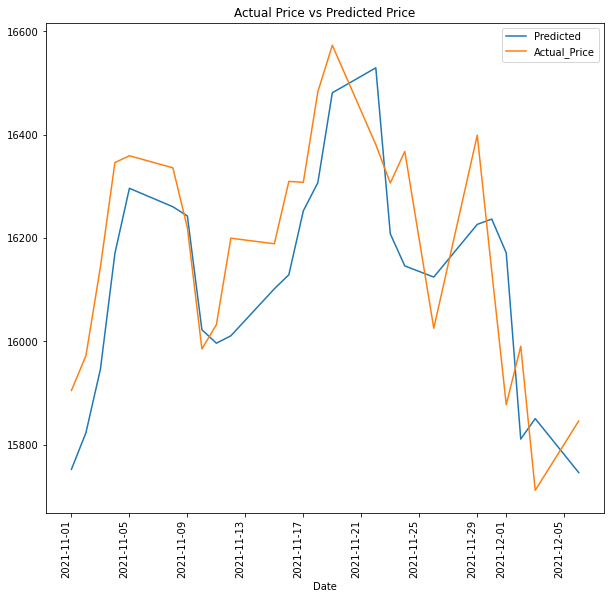

In [52]:
#Visualizing the predictions

df_test.plot(rot=90, title="Actual Price vs Predicted Price", figsize=(10,10))